In [43]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1, 0.001).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

nn = MLPRegressor(
    hidden_layer_sizes=(120,120,120),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = nn.fit(x, y)
test_x = np.arange(0.0, 1, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)

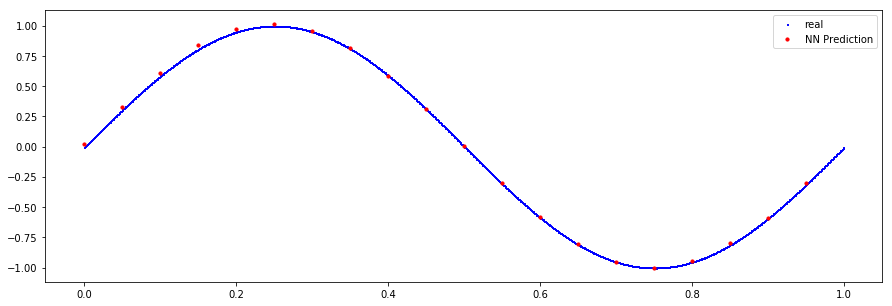

In [44]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()

In [16]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [17]:
f = r.TFile("./data/gm2offline_ana_18398265_1544564276.1650.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :   424000 : Total =       252303494 bytes  File  Size =  109995864 *
*        :          : Tree compression factor =   2.29                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :   424000 : Total  Size=    1698163 bytes  File Size  =      10810 *
*Baskets :       18 : Basket Size=    1039360 bytes  Compression= 157.03     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :   424000 : Total  Size=    1698229 bytes  File Size  =      10822 *
*Baskets :       18 : Basket Size=    1039360 bytes  Compression= 156.86     *
*...............................................

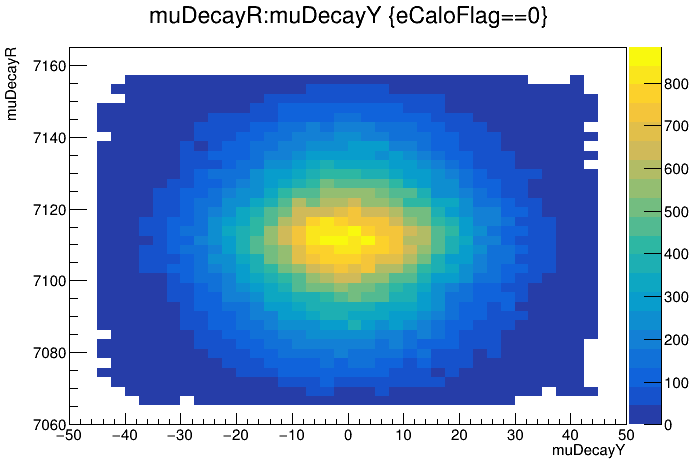

In [36]:
c = r.TCanvas()
t.Draw("muDecayR:muDecayY","eCaloFlag==0","colz")
c.Draw()

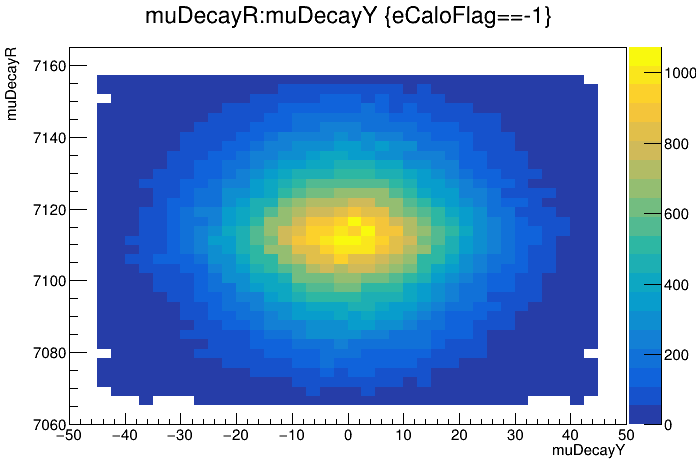

In [37]:
c = r.TCanvas()
t.Draw("muDecayR:muDecayY","eCaloFlag==-1","colz")
c.Draw()

423919


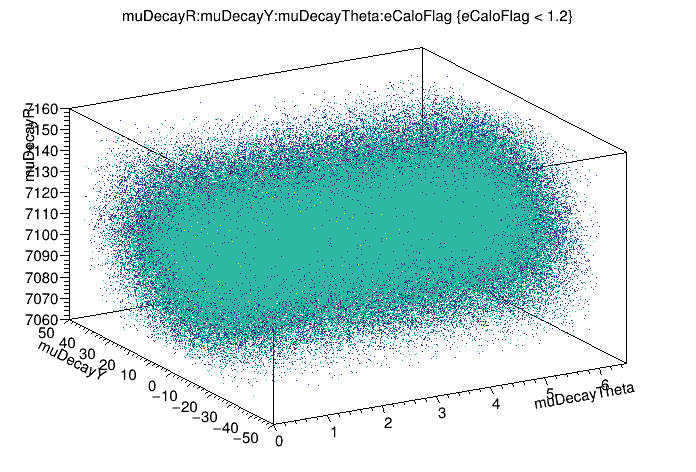

In [38]:
c = r.TCanvas()
nMu = t.Draw("muDecayR:muDecayY:muDecayTheta:eCaloFlag","eCaloFlag < 1.2","")
print(nMu)
c.Draw()

In [39]:
rawMuons = [[],[],[],[]]
for i in range(nMu):
    rawMuons[0].append(t.GetV1()[i])
    rawMuons[1].append(t.GetV2()[i])
    rawMuons[2].append(t.GetV3()[i])
    rawMuons[3].append(t.GetV4()[i])

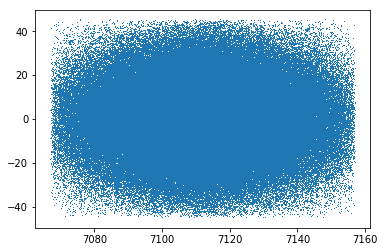

In [40]:
plt.plot(rawMuons[0],rawMuons[1],",")
plt.show()

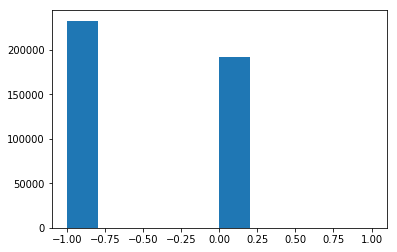

In [41]:
plt.hist(rawMuons[3])
plt.show()